# Student Performance Prediction in order Organize Specialized Training to Improve Teaching Learning Process

### Data Exploration

In [1]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("data_capstone.csv")
data = data.drop('RegNo', axis = 1)

# Success - Display the first record
display(data.head(n=10))

,ENGLISH-I,MATHEMATICS-I,ENGINEERING PHYSICS-I,C PROGRAMMING,ENVIRONMENTAL STUDIES,ENGG PHYSICS and ENGG CHEMISTRY LAB,C PROGRAMMING LAB,ENGLISH � II,MATHEMATICS- II,ENGINEERING CHEMISTRY -II,...,NETWORK AND ELECTRICAL TECHNOLOGY LAB,NETWORK ANALYSIS,SIGNALS & SYSTEMS,ENGLISH_COMMUNICATION_PRACTICE_LAB,SWITCHING_THEORY_and_LOGIC_DESIGN,ANALOG_COMMUNICATIONS,ELECTRONIC_CIRCUIT_ANALYSIS,ELECTRONICS_CIRCUITS_and_PDC_LAB,ANALOG_COMMUNICATIONS_LAB,EMWTL
0,P,P,P,P,P,P,P,P,P,P,...,P,F,P,P,F,P,F,P,P,F
1,P,F,P,P,P,P,P,P,P,P,...,P,F,P,P,P,P,P,P,P,P
2,P,P,P,P,P,P,P,P,P,P,...,P,F,P,P,P,P,P,P,P,P
3,P,P,P,P,P,P,P,P,P,P,...,P,P,P,P,P,P,P,P,P,P
4,P,P,P,P,P,P,P,P,P,P,...,P,P,P,P,P,P,P,P,P,P
5,P,P,P,P,P,P,P,P,P,P,...,P,P,P,P,P,P,P,P,P,F
6,P,P,P,P,P,P,P,P,P,P,...,P,F,P,P,P,P,P,P,P,P
7,P,P,P,P,P,P,P,P,P,P,...,P,P,P,P,P,P,P,P,P,P
8,P,F,P,F,F,P,P,P,P,P,...,P,P,F,P,F,P,F,P,P,F
9,P,P,P,P,P,P,P,P,P,P,...,P,P,P,P,P,P,P,P,P,P


In [2]:
#y1 = data['ENGLISH_COMMUNICATION_PRACTICE_LAB']
y1 = data['SWITCHING_THEORY_and_LOGIC_DESIGN']
y2 = data['ANALOG_COMMUNICATIONS']
y3 = data['ELECTRONIC_CIRCUIT_ANALYSIS']
#y5 = data['ELECTRONICS_CIRCUITS_and_PDC_LAB']
#y4 = data['ANALOG_COMMUNICATIONS_LAB']
y4 = data['EMWTL']

X= data.drop('ENGLISH_COMMUNICATION_PRACTICE_LAB', axis = 1)
X= X.drop('SWITCHING_THEORY_and_LOGIC_DESIGN', axis = 1)
X= X.drop('ANALOG_COMMUNICATIONS', axis = 1)
X= X.drop('ELECTRONIC_CIRCUIT_ANALYSIS', axis = 1)
X= X.drop('ELECTRONICS_CIRCUITS_and_PDC_LAB', axis = 1)
X= X.drop('ANALOG_COMMUNICATIONS_LAB', axis = 1)
X= X.drop('EMWTL', axis = 1)
display(X.head(n=10))

,ENGLISH-I,MATHEMATICS-I,ENGINEERING PHYSICS-I,C PROGRAMMING,ENVIRONMENTAL STUDIES,ENGG PHYSICS and ENGG CHEMISTRY LAB,C PROGRAMMING LAB,ENGLISH � II,MATHEMATICS- II,ENGINEERING CHEMISTRY -II,...,ENGG PHY & ENGG CHEM-LAB-II,ENGLISH COMMUNICATION SKILLS LAB,IT WORKSHOP,MANAGERIAL ECONOMICS AND FINANCIAL ANALYSIS,ELECTRONIC DEVICES AND CIRCUITS,ELECTRONIC DEVICES AND CIRCUITS LAB,ELECTRICAL TECHNOLOGY,NETWORK AND ELECTRICAL TECHNOLOGY LAB,NETWORK ANALYSIS,SIGNALS & SYSTEMS
0,P,P,P,P,P,P,P,P,P,P,...,P,P,P,P,P,P,P,P,F,P
1,P,F,P,P,P,P,P,P,P,P,...,P,P,P,P,F,P,P,P,F,P
2,P,P,P,P,P,P,P,P,P,P,...,P,P,P,P,P,P,P,P,F,P
3,P,P,P,P,P,P,P,P,P,P,...,P,P,P,P,P,P,P,P,P,P
4,P,P,P,P,P,P,P,P,P,P,...,P,P,P,P,F,P,P,P,P,P
5,P,P,P,P,P,P,P,P,P,P,...,P,P,P,P,P,P,P,P,P,P
6,P,P,P,P,P,P,P,P,P,P,...,P,P,P,P,P,P,P,P,F,P
7,P,P,P,P,P,P,P,P,P,P,...,P,P,P,P,P,P,P,P,P,P
8,P,F,P,F,F,P,P,P,P,P,...,P,P,P,P,F,P,F,P,P,F
9,P,P,P,P,P,P,P,P,P,P,...,P,P,P,P,P,P,P,P,P,P


### Data Preprocessing

In [3]:
pd.get_dummies(X)
X = pd.get_dummies(X)
#display(features.head(n = 10))

# TODO: Encode the 'income_raw' data to numerical values
#income = (income_raw == '>50K').astype(np.int)
#display(income.head(n = 10))

# Print the number of features after one-hot encoding
encoded = list(X.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# Uncomment the following line to see the encoded feature names
print encoded


40 total features after one-hot encoding.
['ENGLISH-I_F', 'ENGLISH-I_P', 'MATHEMATICS-I_F', 'MATHEMATICS-I_P', 'ENGINEERING PHYSICS-I_F', 'ENGINEERING PHYSICS-I_P', 'C PROGRAMMING_F', 'C PROGRAMMING_P', 'ENVIRONMENTAL STUDIES_F', 'ENVIRONMENTAL STUDIES_P', 'ENGG PHYSICS and ENGG CHEMISTRY LAB_P', 'C PROGRAMMING LAB_P', 'ENGLISH \x96 II_F', 'ENGLISH \x96 II_P', 'MATHEMATICS- II_F', 'MATHEMATICS- II_P', 'ENGINEERING CHEMISTRY -II_F', 'ENGINEERING CHEMISTRY -II_P', 'ENGINEERING DRAWING_F', 'ENGINEERING DRAWING_P', 'ENGG PHY & ENGG CHEM-LAB-II_F', 'ENGG PHY & ENGG CHEM-LAB-II_P', 'ENGLISH COMMUNICATION SKILLS LAB_F', 'ENGLISH COMMUNICATION SKILLS LAB_P', 'IT WORKSHOP_F', 'IT WORKSHOP_P', 'MANAGERIAL ECONOMICS AND FINANCIAL ANALYSIS_F', 'MANAGERIAL ECONOMICS AND FINANCIAL ANALYSIS_P', 'ELECTRONIC DEVICES AND CIRCUITS_F', 'ELECTRONIC DEVICES AND CIRCUITS_P', 'ELECTRONIC DEVICES AND CIRCUITS LAB_F', 'ELECTRONIC DEVICES AND CIRCUITS LAB_P', 'ELECTRICAL TECHNOLOGY_F', 'ELECTRICAL TECHNOLOGY_P',

In [5]:
display(X.head(n=10))

,ENGLISH-I_F,ENGLISH-I_P,MATHEMATICS-I_F,MATHEMATICS-I_P,ENGINEERING PHYSICS-I_F,ENGINEERING PHYSICS-I_P,C PROGRAMMING_F,C PROGRAMMING_P,ENVIRONMENTAL STUDIES_F,ENVIRONMENTAL STUDIES_P,...,ELECTRONIC DEVICES AND CIRCUITS LAB_F,ELECTRONIC DEVICES AND CIRCUITS LAB_P,ELECTRICAL TECHNOLOGY_F,ELECTRICAL TECHNOLOGY_P,NETWORK AND ELECTRICAL TECHNOLOGY LAB_F,NETWORK AND ELECTRICAL TECHNOLOGY LAB_P,NETWORK ANALYSIS_F,NETWORK ANALYSIS_P,SIGNALS & SYSTEMS_F,SIGNALS & SYSTEMS_P
0,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,1,0,0,1
1,0,1,1,0,0,1,0,1,0,1,...,0,1,0,1,0,1,1,0,0,1
2,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,1,0,0,1
3,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1
4,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1
5,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1
6,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,1,0,0,1
7,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1
8,0,1,1,0,0,1,1,0,1,0,...,0,1,1,0,0,1,0,1,1,0
9,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1


In [4]:
from keras.utils import np_utils
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y1)
print list(le.classes_)
y1= le.transform(y1)

Using TensorFlow backend.


['F', 'P']


In [5]:
le2 = preprocessing.LabelEncoder()
le2.fit(y2)
print list(le2.classes_)
y2= le2.transform(y2)

['F', 'P']


In [6]:
le3 = preprocessing.LabelEncoder()
le3.fit(y3)
print list(le3.classes_)
y3= le3.transform(y3)

['F', 'P']


In [7]:
le4 = preprocessing.LabelEncoder()
le4.fit(y4)
print list(le4.classes_)
y4= le4.transform(y4)

['F', 'P']


In [8]:
y1=pd.DataFrame(y1)
y2=pd.DataFrame(y2)
y3=pd.DataFrame(y3)
y4=pd.DataFrame(y4)



### Splitting Train and Test Data Sets

In [9]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size = 0.2, random_state = 0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size = 0.2, random_state = 0)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y3, test_size = 0.2, random_state = 0)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y4, test_size = 0.2, random_state = 0)






/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Data Overview

In [18]:
total_population=pd.DataFrame(data)
n_records = total_population.shape[0]
print(n_records)

479


In [34]:
print(total_population[total_population.EMWTL=='P'].shape)

(352, 28)


In [12]:
total_population=pd.DataFrame(data)
n_records = total_population.shape[0]

n_Pass1 = total_population[total_population.SWITCHING_THEORY_and_LOGIC_DESIGN=='P'].shape[0]
n_Fail1 = total_population[total_population.SWITCHING_THEORY_and_LOGIC_DESIGN=='F'].shape[0]


# TODO: Percentage of individuals whose income is more than $50,000
Pass_percent1 = (n_Pass1*1.000)/(n_records*1.000)*100

# Print the resultsn_records

print "Percentage of Students Passed: {:.2f}%".format(Pass_percent1)

Percentage of Students Passed: 73.28%


In [13]:
total_population=pd.DataFrame(data)
n_records = total_population.shape[0]

n_Pass2 = total_population[total_population.ANALOG_COMMUNICATIONS=='P'].shape[0]
n_Fail2 = total_population[total_population.ANALOG_COMMUNICATIONS=='F'].shape[0]


# TODO: Percentage of individuals whose income is more than $50,000
Pass_percent2 = (n_Pass2*1.000)/(n_records*1.000)*100

# Print the resultsn_records

print "Percentage of Students Passed: {:.2f}%".format(Pass_percent2)

Percentage of Students Passed: 85.59%


In [14]:
total_population=pd.DataFrame(data)
n_records = total_population.shape[0]

n_Pass3 = total_population[total_population.ELECTRONIC_CIRCUIT_ANALYSIS=='P'].shape[0]
n_Fail3 = total_population[total_population.ELECTRONIC_CIRCUIT_ANALYSIS=='F'].shape[0]


# TODO: Percentage of individuals whose income is more than $50,000
Pass_percent3 = (n_Pass3*1.000)/(n_records*1.000)*100

# Print the resultsn_records

print "Percentage of Students Passed: {:.2f}%".format(Pass_percent3)

Percentage of Students Passed: 77.66%


In [15]:
total_population=pd.DataFrame(data)
n_records = total_population.shape[0]

n_Pass4 = total_population[total_population.EMWTL=='P'].shape[0]
n_Fail4 = total_population[total_population.EMWTL=='F'].shape[0]


# TODO: Percentage of individuals whose income is more than $50,000
Pass_percent4 = (n_Pass4*1.000)/(n_records*1.000)*100

# Print the resultsn_records

print "Percentage of Students Passed: {:.2f}%".format(Pass_percent4)

Percentage of Students Passed: 73.49%


### Naive Predictor

In [37]:
accuracy1 = (n_Pass1*1.0)/ n_records 
true_positive = n_Pass1*1.0
true_negative = 0.0
false_positive = n_Fail1*1.0
false_negative=0.0

precision = true_positive / (true_positive + false_positive)

recall = true_positive / (true_positive + false_negative)
beta=0.5
fscore1=(1+(beta*beta))*((precision*recall)/(((beta*beta)*precision)+recall))
# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy1, fscore1)

Naive Predictor: [Accuracy score: 0.7328, F-score: 0.7742]


In [38]:
accuracy2 = (n_Pass2*1.0)/ n_records 
true_positive = n_Pass2*1.0
true_negative = 0.0
false_positive = n_Fail2*1.0
false_negative=0.0

precision = true_positive / (true_positive + false_positive)

recall = true_positive / (true_positive + false_negative)
beta=0.5
fscore2=(1+(beta*beta))*((precision*recall)/(((beta*beta)*precision)+recall))
# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy2, fscore2)

Naive Predictor: [Accuracy score: 0.8559, F-score: 0.8813]


In [39]:
accuracy3 = (n_Pass3*1.0)/ n_records 
true_positive = n_Pass3*1.0
true_negative = 0.0
false_positive = n_Fail3*1.0
false_negative=0.0

precision = true_positive / (true_positive + false_positive)

recall = true_positive / (true_positive + false_negative)
beta=0.5
fscore3=(1+(beta*beta))*((precision*recall)/(((beta*beta)*precision)+recall))
# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy3, fscore3)

Naive Predictor: [Accuracy score: 0.7766, F-score: 0.8129]


In [40]:
accuracy4 = (n_Pass4*1.0)/ n_records 
true_positive = n_Pass4*1.0
true_negative = 0.0
false_positive = n_Fail4*1.0
false_negative=0.0

precision = true_positive / (true_positive + false_positive)

recall = true_positive / (true_positive + false_negative)
beta=0.5
fscore4=(1+(beta*beta))*((precision*recall)/(((beta*beta)*precision)+recall))
# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy4, fscore4)

Naive Predictor: [Accuracy score: 0.7349, F-score: 0.7760]


### Selecting best classifier for Y1

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    #x1=X_train[sample_size:]
    #y1=y_train[sample_size:]
    #print sample_size
    #print X_train.values[:sample_size, :].shape[0]
    #print learner
    learner =  learner.fit(X_train.values[:sample_size, :],y_train.values[:sample_size])
    end = time() # Get end time
    train_time = end-start
    print 'Train_time :',train_time
    # TODO: Calculate the training time
    results['train_time'] = end-start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train.values[:300, :])
    end = time() # Get end time
    pred_time = end-start
    print 'Prediction_time :',pred_time
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300],predictions_train, average='macro', beta=0.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test,predictions_test, average='macro', beta=0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
    print results    
    # Return the results
    return results

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import tree

# TODO: Initialize the three models
clf_A = tree.DecisionTreeClassifier(random_state=1)
clf_B = SVC(random_state=1)
clf_C = GradientBoostingClassifier(random_state=1)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(0.01*X_train1.shape[0])
samples_10 = int(0.1*X_train1.shape[0])
samples_100 = int(X_train1.shape[0])

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train1, y_train1, X_test1, y_test1)

# Run metrics visualization for the three supervised learning models chosen
#vs.evaluate(results, accuracy, fscore)

Train_time : 0.00254511833191
Prediction_time : 0.000706911087036
DecisionTreeClassifier trained on 383 samples.
{'pred_time': 0.0007069110870361328, 'f_test': 0.72078086512120454, 'train_time': 0.0025451183319091797, 'acc_train': 0.93333333333333335, 'acc_test': 0.77083333333333337, 'f_train': 0.92231994587613009}
Train_time : 0.0188491344452
Prediction_time : 0.00857901573181
SVC trained on 383 samples.
{'pred_time': 0.008579015731811523, 'f_test': 0.83809523809523812, 'train_time': 0.01884913444519043, 'acc_train': 0.83333333333333337, 'acc_test': 0.85416666666666663, 'f_train': 0.78474555110028432}
Train_time : 0.127761125565
Prediction_time : 0.00197792053223
GradientBoostingClassifier trained on 383 samples.
{'pred_time': 0.0019779205322265625, 'f_test': 0.74627870043874989, 'train_time': 0.1277611255645752, 'acc_train': 0.90000000000000002, 'acc_test': 0.79166666666666663, 'f_train': 0.87901031305023902}


/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
from sklearn.metrics import r2_score


def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    print score
    # Return the score
    return score

### OPtimizing Classifier

In [15]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import  make_scorer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
# TODO: Initialize the classifier
clf = SVC(random_state=1)
cv_sets = ShuffleSplit(X_train1.shape[0], n_iter=10, test_size = 0.20, random_state = 0)
# TODO: Create the parameters list you wish to tune
parameters = {'C': [0.2,0.5,1.0,1.5,2.0],'decision_function_shape':['ovo', 'ovr',None] ,'shrinking':[True,False]}

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters,scoring=scorer,cv=cv_sets)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train1, y_train1)

# Get the estimator
best_clf = grid_fit.best_estimator_
print grid_fit.best_estimator_
# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train1, y_train1)).predict(X_test1)
best_predictions = best_clf.predict(X_test1)
best_train_predictions = best_clf.predict(X_train1)
print 'Best parameters:'
print grid_fit.best_params_
print('Scores for each parameter')
display(pd.DataFrame(grid_fit.grid_scores_))

# Report the before-and-afterscores
print "Final accuracy score on the training data: {:.4f}".format(accuracy_score(y_train1, best_train_predictions))
print "Final F-score on the training data: {:.4f}".format(fbeta_score(y_train1, best_train_predictions, beta = 0.5))

print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test1, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test1, best_predictions, beta = 0.5))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)
Best parameters:
{'shrinking': True, 'C': 1.0, 'decision_function_shape': 'ovo'}
Scores for each parameter


/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


,parameters,mean_validation_score,cv_validation_scores
0,"{u'shrinking': True, u'C': 0.2, u'decision_fun...",0.837895,"[0.860058309038, 0.889570552147, 0.77777777777..."
1,"{u'shrinking': False, u'C': 0.2, u'decision_fu...",0.837895,"[0.860058309038, 0.889570552147, 0.77777777777..."
2,"{u'shrinking': True, u'C': 0.2, u'decision_fun...",0.837895,"[0.860058309038, 0.889570552147, 0.77777777777..."
3,"{u'shrinking': False, u'C': 0.2, u'decision_fu...",0.837895,"[0.860058309038, 0.889570552147, 0.77777777777..."
4,"{u'shrinking': True, u'C': 0.2, u'decision_fun...",0.837895,"[0.860058309038, 0.889570552147, 0.77777777777..."
5,"{u'shrinking': False, u'C': 0.2, u'decision_fu...",0.837895,"[0.860058309038, 0.889570552147, 0.77777777777..."
6,"{u'shrinking': True, u'C': 0.5, u'decision_fun...",0.858294,"[0.909090909091, 0.885093167702, 0.82437275985..."
7,"{u'shrinking': False, u'C': 0.5, u'decision_fu...",0.858294,"[0.909090909091, 0.885093167702, 0.82437275985..."
8,"{u'shrinking': True, u'C': 0.5, u'decision_fun...",0.858294,"[0.909090909091, 0.885093167702, 0.82437275985..."
9,"{u'shrinking': False, u'C': 0.5, u'decision_fu...",0.858294,"[0.909090909091, 0.885093167702, 0.82437275985..."


Final accuracy score on the training data: 0.8355
Final F-score on the training data: 0.8666
Final accuracy score on the testing data: 0.8542
Final F-score on the testing data: 0.8667


### Selecting best classifier for Y2

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import tree

# TODO: Initialize the three models
clf_A = tree.DecisionTreeClassifier(random_state=1)
clf_B = SVC(random_state=1)
clf_C = GradientBoostingClassifier(random_state=1)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(0.01*X_train2.shape[0])
samples_10 = int(0.1*X_train2.shape[0])
samples_100 = int(X_train2.shape[0])

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train2, y_train2, X_test2, y_test2)

# Run metrics visualization for the three supervised learning models chosen
#vs.evaluate(results, accuracy, fscore)

Train_time : 0.00241613388062
Prediction_time : 0.000563144683838
DecisionTreeClassifier trained on 383 samples.
{'pred_time': 0.0005631446838378906, 'f_test': 0.63128107479107176, 'train_time': 0.0024161338806152344, 'acc_train': 0.93999999999999995, 'acc_test': 0.82291666666666663, 'f_train': 0.91263712328224633}
Train_time : 0.00866508483887
Prediction_time : 0.0064959526062
SVC trained on 383 samples.
{'pred_time': 0.006495952606201172, 'f_test': 0.44432548179871528, 'train_time': 0.008665084838867188, 'acc_train': 0.84333333333333338, 'acc_test': 0.86458333333333337, 'f_train': 0.43530626290433583}
Train_time : 0.123105049133
Prediction_time : 0.00198292732239
GradientBoostingClassifier trained on 383 samples.
{'pred_time': 0.0019829273223876953, 'f_test': 0.63949891741416642, 'train_time': 0.12310504913330078, 'acc_train': 0.92333333333333334, 'acc_test': 0.84375, 'f_train': 0.88091988669556542}


/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### OPtimizing Classifier

In [10]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import  make_scorer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import make_scorer
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
# TODO: Initialize the classifier

cv_sets = ShuffleSplit(X_train2.shape[0], n_iter=10, test_size = 0.20, random_state = 0)
# TODO: Create the parameters list you wish to tune
clf = GradientBoostingClassifier(random_state=1)

# TODO: Create the parameters list you wish to tune
parameters = {'learning_rate':[0.1,0.5,1],'n_estimators':[50,100,150],'min_samples_leaf':[1,3,5,7,15],'min_samples_split':[2,10,20],'max_depth':[1,3,5]}

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters,scoring=scorer,cv=cv_sets)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train2, y_train2)

# Get the estimator
best_clf = grid_fit.best_estimator_
print grid_fit.best_estimator_
# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train2, y_train2)).predict(X_test2)
best_train_predictions = best_clf.predict(X_train2)
best_predictions = best_clf.predict(X_test2)
print 'Best parameters:'
print grid_fit.best_params_
print('Scores for each parameter')
display(pd.DataFrame(grid_fit.grid_scores_))

# Report the before-and-afterscores

print "Final accuracy score on the training data: {:.4f}".format(accuracy_score(y_train2, best_train_predictions))
print "Final F-score on the traning data: {:.4f}".format(fbeta_score(y_train2, best_train_predictions, beta = 0.5))

print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test2, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test2, best_predictions, beta = 0.5))

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=5,
              min_samples_split=20, min_weight_fraction_leaf=0.0,
              n_estimators=50, presort='auto', random_state=1,
              subsample=1.0, verbose=0, warm_start=False)
Best parameters:
{'min_samples_split': 20, 'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 5}
Scores for each parameter


/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


,parameters,mean_validation_score,cv_validation_scores
0,"{u'min_samples_split': 2, u'n_estimators': 50,...",0.902110,"[0.92032967033, 0.912921348315, 0.858895705521..."
1,"{u'min_samples_split': 2, u'n_estimators': 100...",0.901369,"[0.92032967033, 0.909090909091, 0.872781065089..."
2,"{u'min_samples_split': 2, u'n_estimators': 150...",0.899094,"[0.92032967033, 0.909090909091, 0.872781065089..."
3,"{u'min_samples_split': 10, u'n_estimators': 50...",0.902110,"[0.92032967033, 0.912921348315, 0.858895705521..."
4,"{u'min_samples_split': 10, u'n_estimators': 10...",0.901369,"[0.92032967033, 0.909090909091, 0.872781065089..."
5,"{u'min_samples_split': 10, u'n_estimators': 15...",0.899094,"[0.92032967033, 0.909090909091, 0.872781065089..."
6,"{u'min_samples_split': 20, u'n_estimators': 50...",0.902110,"[0.92032967033, 0.912921348315, 0.858895705521..."
7,"{u'min_samples_split': 20, u'n_estimators': 10...",0.901369,"[0.92032967033, 0.909090909091, 0.872781065089..."
8,"{u'min_samples_split': 20, u'n_estimators': 15...",0.899094,"[0.92032967033, 0.909090909091, 0.872781065089..."
9,"{u'min_samples_split': 2, u'n_estimators': 50,...",0.903917,"[0.92032967033, 0.92032967033, 0.869565217391,..."


Final accuracy score on the training data: 0.9373
Final F-score on the traning data: 0.9475
Final accuracy score on the testing data: 0.8438
Final F-score on the testing data: 0.8966


### Selecting best classifier for Y3

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import tree

# TODO: Initialize the three models
clf_A = tree.DecisionTreeClassifier(random_state=1)
clf_B = SVC(random_state=1)
clf_C = GradientBoostingClassifier(random_state=1)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(0.01*X_train3.shape[0])
samples_10 = int(0.1*X_train3.shape[0])
samples_100 = int(X_train3.shape[0])

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train3, y_train3, X_test3, y_test3)

# Run metrics visualization for the three supervised learning models chosen
#vs.evaluate(results, accuracy, fscore)

Train_time : 0.00290012359619
Prediction_time : 0.000747919082642
DecisionTreeClassifier trained on 383 samples.
{'pred_time': 0.0007479190826416016, 'f_test': 0.73829513420762338, 'train_time': 0.0029001235961914062, 'acc_train': 0.93999999999999995, 'acc_test': 0.82291666666666663, 'f_train': 0.92769096434727372}
Train_time : 0.0128569602966
Prediction_time : 0.0106151103973
SVC trained on 383 samples.
{'pred_time': 0.010615110397338867, 'f_test': 0.72649101532355864, 'train_time': 0.01285696029663086, 'acc_train': 0.84333333333333338, 'acc_test': 0.8125, 'f_train': 0.7719584149232197}
Train_time : 0.134913921356
Prediction_time : 0.00201320648193
GradientBoostingClassifier trained on 383 samples.
{'pred_time': 0.0020132064819335938, 'f_test': 0.70726495726495719, 'train_time': 0.13491392135620117, 'acc_train': 0.91333333333333333, 'acc_test': 0.80208333333333337, 'f_train': 0.88936842853083264}


### OPtimizing Classifier

In [13]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import  make_scorer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn import tree
# TODO: Initialize the classifier
clf = tree.DecisionTreeClassifier(random_state=1)
cv_sets = ShuffleSplit(X_train3.shape[0], n_iter=10, test_size = 0.20, random_state = 0)
# TODO: Create the parameters list you wish to tune
parameters = {'criterion':['gini','entropy'],'splitter':['best','random'],'min_samples_leaf':[1,3,5,7,15],'min_samples_split':[2,10,20],'max_depth':[None,1,3,5]}

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters,scoring=scorer,cv=cv_sets)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train3, y_train3)

# Get the estimator
best_clf = grid_fit.best_estimator_
print grid_fit.best_estimator_
# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train3, y_train3)).predict(X_test3)
best_train_predictions = best_clf.predict(X_train3)
best_predictions = best_clf.predict(X_test3)
print 'Best parameters:'
print grid_fit.best_params_
print('Scores for each parameter')
display(pd.DataFrame(grid_fit.grid_scores_))

# Report the before-and-afterscores

print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_train3, best_train_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_train3, best_train_predictions, beta = 0.5))

print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test3, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test3, best_predictions, beta = 0.5))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')
Best parameters:
{'min_samples_split': 2, 'splitter': 'best', 'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 1}
Scores for each parameter


/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


,parameters,mean_validation_score,cv_validation_scores
0,"{u'min_samples_split': 2, u'splitter': u'best'...",0.850764,"[0.891238670695, 0.862068965517, 0.83928571428..."
1,"{u'min_samples_split': 2, u'splitter': u'rando...",0.852703,"[0.897832817337, 0.857142857143, 0.85144927536..."
2,"{u'min_samples_split': 10, u'splitter': u'best...",0.849283,"[0.886850152905, 0.845921450151, 0.83928571428..."
3,"{u'min_samples_split': 10, u'splitter': u'rand...",0.848808,"[0.886850152905, 0.845921450151, 0.83928571428..."
4,"{u'min_samples_split': 20, u'splitter': u'best...",0.853146,"[0.882352941176, 0.851393188854, 0.85714285714..."
5,"{u'min_samples_split': 20, u'splitter': u'rand...",0.853096,"[0.882352941176, 0.851393188854, 0.85714285714..."
6,"{u'min_samples_split': 2, u'splitter': u'best'...",0.849672,"[0.897832817337, 0.846394984326, 0.83333333333..."
7,"{u'min_samples_split': 2, u'splitter': u'rando...",0.842402,"[0.865671641791, 0.846394984326, 0.83333333333..."
8,"{u'min_samples_split': 10, u'splitter': u'best...",0.849232,"[0.880597014925, 0.85626911315, 0.827205882353..."
9,"{u'min_samples_split': 10, u'splitter': u'rand...",0.846303,"[0.891238670695, 0.85626911315, 0.827205882353..."


Final accuracy score on the testing data: 0.7990
Final F-score on the testing data: 0.8916
Final accuracy score on the testing data: 0.7188
Final F-score on the testing data: 0.8436


### Selecting best classifier for Y4

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import tree

# TODO: Initialize the three models
clf_A = tree.DecisionTreeClassifier(random_state=1)
clf_B = SVC(random_state=1)
clf_C = GradientBoostingClassifier(random_state=1)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(0.01*X_train4.shape[0])
samples_10 = int(0.1*X_train4.shape[0])
samples_100 = int(X_train4.shape[0])

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train4, y_train4, X_test4, y_test4)

# Run metrics visualization for the three supervised learning models chosen
#vs.evaluate(results, accuracy, fscore)

Train_time : 0.00232195854187
Prediction_time : 0.00068211555481
DecisionTreeClassifier trained on 383 samples.
{'pred_time': 0.0006821155548095703, 'f_test': 0.66907013765333834, 'train_time': 0.002321958541870117, 'acc_train': 0.91666666666666663, 'acc_test': 0.72916666666666663, 'f_train': 0.90790988697997155}
Train_time : 0.0122449398041
Prediction_time : 0.00952696800232
SVC trained on 383 samples.
{'pred_time': 0.009526968002319336, 'f_test': 0.75307125307125311, 'train_time': 0.012244939804077148, 'acc_train': 0.81666666666666665, 'acc_test': 0.79166666666666663, 'f_train': 0.76521270708474132}
Train_time : 0.129961013794
Prediction_time : 0.00216817855835
GradientBoostingClassifier trained on 383 samples.
{'pred_time': 0.0021681785583496094, 'f_test': 0.58841362584059087, 'train_time': 0.1299610137939453, 'acc_train': 0.90000000000000002, 'acc_test': 0.6875, 'f_train': 0.89110213638951241}


### OPtimizing Classifier

In [72]:
from sklearn.metrics import  make_scorer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
# TODO: Initialize the classifier
clf = SVC(random_state=1)
cv_sets = ShuffleSplit(X_train4.shape[0], n_iter=10, test_size = 0.20, random_state = 0)
# TODO: Create the parameters list you wish to tune
parameters = {'kernel':['rbf','poly','linear','sigmoid'],'C': [0.2,0.5,1.0,1.5,2.0],'decision_function_shape':['ovo', 'ovr','None'] ,'degree':[2,3,4,5,6,7],'shrinking':[True,False],'probability':[True,False],'coef0':[0.0,0.5,1.0]}

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters,scoring=scorer,cv=cv_sets)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train4, y_train4)

# Get the estimator
best_clf = grid_fit.best_estimator_
print grid_fit.best_estimator_
# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train4, y_train4)).predict(X_test4)
best_train_predictions = best_clf.predict(X_train4)
best_predictions = best_clf.predict(X_test4)
print 'Best parameters:'
print grid_fit.best_params_
print('Scores for each parameter')
display(pd.DataFrame(grid_fit.grid_scores_))

# Report the before-and-afterscores

print "Final accuracy score on the traing data: {:.4f}".format(accuracy_score(y_train4, best_train_predictions))
print "Final F-score on the traing data: {:.4f}".format(fbeta_score(y_train4, best_train_predictions, beta = 0.5))

print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test4, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test4, best_predictions, beta = 0.5))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovo', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
  verbose=False)
Best parameters:
{'kernel': 'poly', 'C': 1.0, 'degree': 2, 'probability': True, 'shrinking': True, 'decision_function_shape': 'ovo', 'coef0': 1.0}
Scores for each parameter


/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


,parameters,mean_validation_score,cv_validation_scores
0,"{u'kernel': u'rbf', u'C': 0.2, u'degree': 2, u...",0.788195,"[0.803814713896, 0.814285714286, 0.75667655786..."
1,"{u'kernel': u'rbf', u'C': 0.2, u'degree': 2, u...",0.788195,"[0.803814713896, 0.814285714286, 0.75667655786..."
2,"{u'kernel': u'rbf', u'C': 0.2, u'degree': 2, u...",0.788195,"[0.803814713896, 0.814285714286, 0.75667655786..."
3,"{u'kernel': u'rbf', u'C': 0.2, u'degree': 2, u...",0.788195,"[0.803814713896, 0.814285714286, 0.75667655786..."
4,"{u'kernel': u'poly', u'C': 0.2, u'degree': 2, ...",0.775926,"[0.803814713896, 0.792349726776, 0.73407202216..."
5,"{u'kernel': u'poly', u'C': 0.2, u'degree': 2, ...",0.775926,"[0.803814713896, 0.792349726776, 0.73407202216..."
6,"{u'kernel': u'poly', u'C': 0.2, u'degree': 2, ...",0.775926,"[0.803814713896, 0.792349726776, 0.73407202216..."
7,"{u'kernel': u'poly', u'C': 0.2, u'degree': 2, ...",0.775926,"[0.803814713896, 0.792349726776, 0.73407202216..."
8,"{u'kernel': u'linear', u'C': 0.2, u'degree': 2...",0.833444,"[0.846905537459, 0.828025477707, 0.81227436823..."
9,"{u'kernel': u'linear', u'C': 0.2, u'degree': 2...",0.833444,"[0.846905537459, 0.828025477707, 0.81227436823..."


Final accuracy score on the traing data: 0.8172
Final F-score on the traing data: 0.8569
Final accuracy score on the testing data: 0.7917
Final F-score on the testing data: 0.8243


### Finding Five Most Predictive Features

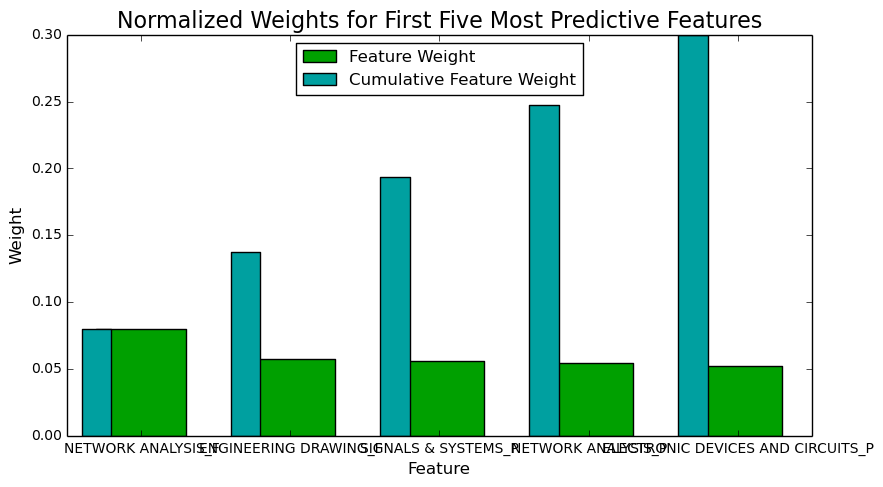

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
# TODO: Train the supervised model on the training set 
model = GradientBoostingClassifier(random_state=1)
model.fit(X_train1, y_train1)
# TODO: Extract the feature importances
importances =model.feature_importances_

# Plot
vs.feature_plot(importances, X_train1, y_train1)

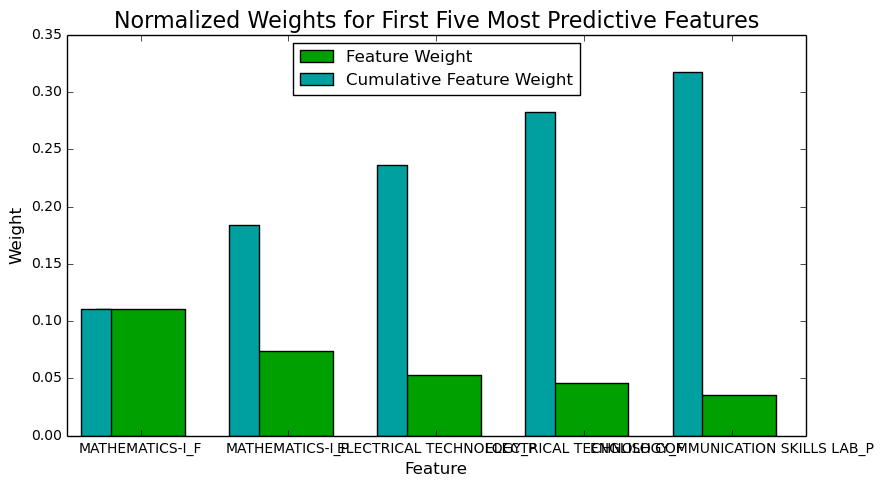

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
# TODO: Train the supervised model on the training set 
model = GradientBoostingClassifier(random_state=1)
model.fit(X_train2, y_train2)
# TODO: Extract the feature importances
importances =model.feature_importances_

# Plot
vs.feature_plot(importances, X_train2, y_train2)

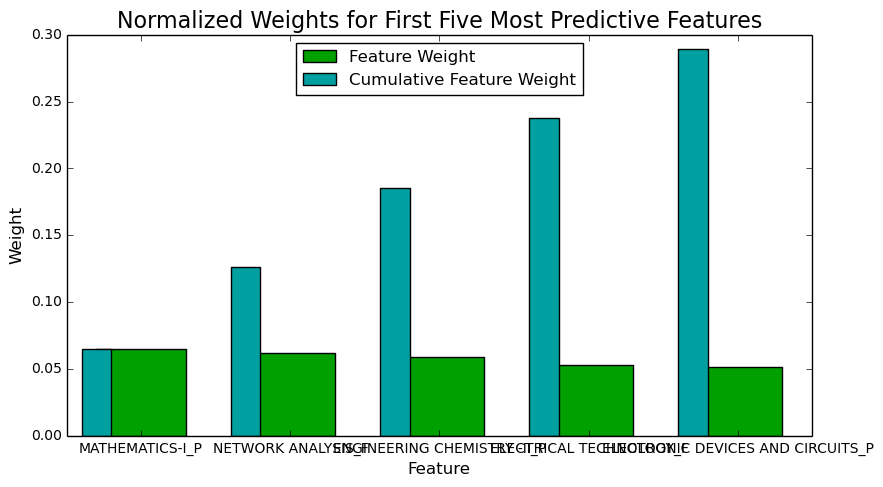

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
# TODO: Train the supervised model on the training set 
model = GradientBoostingClassifier(random_state=1)
model.fit(X_train3, y_train3)
# TODO: Extract the feature importances
importances =model.feature_importances_

# Plot
vs.feature_plot(importances, X_train3, y_train3)

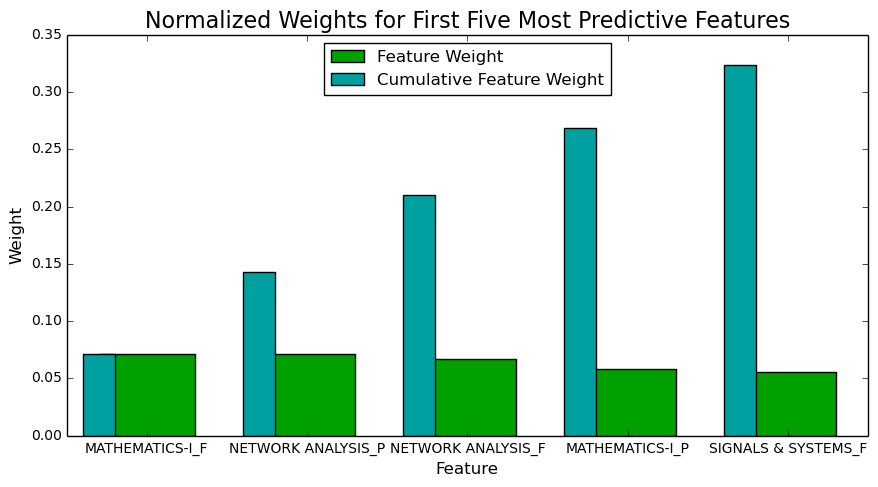

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
# TODO: Train the supervised model on the training set 
model = GradientBoostingClassifier(random_state=1)
model.fit(X_train4, y_train4)
# TODO: Extract the feature importances
importances =model.feature_importances_

# Plot
vs.feature_plot(importances, X_train4, y_train4)

In [17]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train1[X_train1.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test1[X_test1.columns.values[(np.argsort(importances)[::-1])[:5]]]

clf1=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=2, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
  verbose=False)




# Train on the "best" model found from grid search earlier
start = time()
clf = clf1.fit(X_train_reduced, y_train1)
end = time()
train_time= end-start
print 'Training Time :',train_time 
# Make new predictions
start1 = time()
reduced_predictions = clf.predict(X_test_reduced)
end1 = time()
pred_time= end1-start1
print 'Prediction Time :',pred_time 
# Report scores from the final model using both versions of data
#print "Final Model trained on full data\n------"
#print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test1, best_predictions))
#print "F-score on testing data: {:.4f}".format(fbeta_score(y_test1, best_predictions, beta = 0.5))
#print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test1, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test1, reduced_predictions, beta = 0.5))

Training Time : 0.0612552165985
Prediction Time : 0.00074291229248
Accuracy on testing data: 0.7708
F-score on testing data: 0.7985


In [19]:
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train2[X_train2.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test2[X_test2.columns.values[(np.argsort(importances)[::-1])[:5]]]
clf2=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=5,
              min_samples_split=20, min_weight_fraction_leaf=0.0,
              n_estimators=50, presort='auto', random_state=1,
              subsample=1.0, verbose=0, warm_start=False)
# Train on the "best" model found from grid search earlier
start = time()
clf = clf2.fit(X_train_reduced, y_train2)
end = time()
train_time= end-start
print 'Training Time :',train_time 
# Make new predictions
start1 = time()
reduced_predictions = clf.predict(X_test_reduced)
end1 = time()
pred_time= end1-start1
print 'Prediction Time :',pred_time 
# Report scores from the final model using both versions of data
#print "Final Model trained on full data\n------"
#print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test1, best_predictions))
#print "F-score on testing data: {:.4f}".format(fbeta_score(y_test1, best_predictions, beta = 0.5))
#print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test2, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test2, reduced_predictions, beta = 0.5))

Training Time : 0.0481288433075
Prediction Time : 0.000818014144897
Accuracy on testing data: 0.8125
F-score on testing data: 0.8817


In [21]:
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train3[X_train3.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test3[X_test3.columns.values[(np.argsort(importances)[::-1])[:5]]]
clf3=tree.DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')


# Train on the "best" model found from grid search earlier
start = time()
clf = clf3.fit(X_train_reduced, y_train3)
end = time()
train_time= end-start
print 'Training Time :',train_time 
# Make new predictions
start1 = time()
reduced_predictions = clf.predict(X_test_reduced)
end1 = time()
pred_time= end1-start1
print 'Prediction Time :',pred_time 
# Report scores from the final model using both versions of data
#print "Final Model trained on full data\n------"
#print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test1, best_predictions))
#print "F-score on testing data: {:.4f}".format(fbeta_score(y_test1, best_predictions, beta = 0.5))
#print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test3, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test3, reduced_predictions, beta = 0.5))

Training Time : 0.00092601776123
Prediction Time : 0.000465869903564
Accuracy on testing data: 0.7188
F-score on testing data: 0.8436


In [16]:
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train4[X_train4.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test4[X_test4.columns.values[(np.argsort(importances)[::-1])[:5]]]



# Train on the "best" model found from grid search earlier
start = time()
clf = (clone(best_clf)).fit(X_train_reduced, y_train4)
end = time()
train_time= end-start
print 'Training Time :',train_time 
# Make new predictions
start1 = time()
reduced_predictions = clf.predict(X_test_reduced)
end1 = time()
pred_time= end1-start1
print 'Prediction Time :',pred_time 
# Report scores from the final model using both versions of data
#print "Final Model trained on full data\n------"
#print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test1, best_predictions))
#print "F-score on testing data: {:.4f}".format(fbeta_score(y_test1, best_predictions, beta = 0.5))
#print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test4, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test4, reduced_predictions, beta = 0.5))

Training Time : 0.00232911109924
Prediction Time : 0.000509977340698
Accuracy on testing data: 0.7708
F-score on testing data: 0.8237


#### Results:

|    F-Score                            | Benchmark Predictor | Unoptimized Model | Optimized Model |Feature Sel Model
| :-------------------------------:     | :-----------------: | :---------------: | :-------------: |:--------------: 
| SWITCHING_THEORY_and_LOGIC_DESIGN(y1) |0.7742               |0.8380             |0.8667           |0.7985
| ANALOG_COMMUNICATIONS(y2)             |0.8813               |0.6394             |0.8966           |0.8817
| ELECTRONIC_CIRCUIT_ANALYSIS(y3)       |0.8129               |0.7382             |0.8436           |0.8436          
| EMWTL(y4)                             |0.7760               |0.5884             |0.8243           |0.8237
